<div style="background-color: teal; padding: 5px; border-radius: 5px; font-size: 20px; font-weight: bold; color: white;">
    GROUP 1 - PYTHON PROJECT - RETAIL SALES DATA - HERO VIRED - ABADS - BATCH 10
</div>

<div style="background-color: #ADD8E6; padding: 5px; border-radius: 5px; font-size: 20px; font-weight: bold">
    STEP - 1 : Importing All The Libraries
</div>

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats.mstats import winsorize
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

<div style="background-color: #ADD8E6; padding: 5px; border-radius: 5px; font-size: 20px; font-weight: bold">
   STEP - 2 : Data Quality and Check (Task 1)
</div>

<div style="background-color: #90EE90; padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
    1. Create a consolidated view of data by joining the data present in three files.
</div>

In [2]:
# Opening the text file.
with open (r'C:\Users\shikh\OneDrive\Desktop\Capstone Project\Retail_Sales_ABADS\demographics.txt') as file:
        columns = file.readline().strip().split('\t')
        data = []
        for line in file:
            row = line.strip().split('\t')
            data.append(row)

In [3]:
df = pd.DataFrame(data, columns=columns)

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,SP


In [5]:
df.shape

(2240, 9)

In [6]:
# Opening behaviour json file
with open(r"C:\Users\shikh\OneDrive\Desktop\Capstone Project\Retail_Sales_ABADS\behaviour.json") as f:
    data = json.load(f)

# Initialize an empty list to store dictionaries
rows = []

# Iterate over each dictionary in the list
for item in data:
    # Extract the ID and attributes from the dictionary
    id_ = list(item.keys())[0]
    attributes = item[id_]
    
    # Create a dictionary with ID as a key and attributes
    row = {'ID': id_}
    row.update(attributes)
    rows.append(row)

# Create a DataFrame from the list of dictionaries
df1 = pd.DataFrame(rows)

In [7]:
df1.shape

(2240, 13)

In [8]:
df1.head()

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,ID_1826,0,189,104,379,111,189,218,1,4,4,6,1
1,ID_1,0,464,5,64,7,0,37,1,7,3,7,5
2,ID_10476,0,134,11,59,15,2,30,1,3,2,5,2
3,ID_1386,0,10,0,1,0,0,0,1,1,0,2,7
4,ID_5371,0,6,16,24,11,0,34,2,3,1,2,7


In [9]:
# Opening Campaign json file.
with open(r"C:\Users\shikh\OneDrive\Desktop\Capstone Project\Retail_Sales_ABADS\campaign.json") as f:
    data = json.load(f)

# Initialize an empty list to store dictionaries
rows = []

# Iterate over each dictionary in the list
for item in data:
    # Extract the ID and attributes from the dictionary
    id_ = list(item.keys())[0]
    attributes = item[id_]
    
    # Create a dictionary with ID as a key and attributes
    row = {'ID': id_}
    row.update(attributes)
    rows.append(row)

# Create a DataFrame from the list of dictionaries
df2 = pd.DataFrame(rows)

In [10]:
df2.shape

(2240, 8)

In [11]:
df2.head()

,ID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,ID_1826,0,0,0,0,0,1,0
1,ID_1,0,1,0,0,0,1,0
2,ID_10476,0,0,0,0,0,0,0
3,ID_1386,0,0,0,0,0,0,0
4,ID_5371,0,0,1,0,0,1,0


In [12]:
# Merging df1 & df2 files on the basis of ID column.
df3 = pd.merge(df1, df2, on='ID')

In [13]:
# Removing ID text and underscore from ID column
df3['ID'] = df3['ID'].str.replace('ID_', '')

In [14]:
df3.head()

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0
1,1,0,464,5,64,7,0,37,1,7,3,7,5,0,1,0,0,0,1,0
2,10476,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0
3,1386,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0
4,5371,0,6,16,24,11,0,34,2,3,1,2,7,0,0,1,0,0,1,0


In [15]:
# Merging df3 with text file df on ID column
final_df=pd.merge(df, df3, on='ID')

In [16]:
final_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Country', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response', 'Complain'],
      dtype='object')

<div style="background-color: #90EE90; padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
    2. Are there any variables where you will need to clean the raw data, what kind of cleaning will be needed?
</div>

In [17]:
final_df.rename(columns = {' Income ':'Income'}, inplace = True)

In [18]:
final_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Country', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response', 'Complain'],
      dtype='object')

In [19]:
final_df['Income'] = final_df['Income'].str.replace('$', '')

In [20]:
final_df['Income'] = final_df['Income'].str.replace(',', '')

In [21]:
final_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,1970,Graduation,Divorced,84835.00,0,0,6/16/14,SP,0,...,4,6,1,0,0,0,0,0,1,0
1,1,1961,Graduation,Single,57091.00,0,0,6/15/14,CA,0,...,3,7,5,0,1,0,0,0,1,0
2,10476,1958,Graduation,Married,67267.00,0,1,5/13/14,US,0,...,2,5,2,0,0,0,0,0,0,0
3,1386,1967,Graduation,Together,32474.00,1,1,5/11/14,AUS,0,...,0,2,7,0,0,0,0,0,0,0
4,5371,1989,Graduation,Single,21474.00,1,0,4/8/14,SP,0,...,1,2,7,0,0,1,0,0,1,0


In [22]:
final_df['Income'] = final_df['Income'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)
final_df['Income'] = pd.to_numeric(final_df['Income'], errors='coerce')  # Coerce errors to NaN

In [23]:
final_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,SP,0,...,4,6,1,0,0,0,0,0,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,CA,0,...,3,7,5,0,1,0,0,0,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,US,0,...,2,5,2,0,0,0,0,0,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,AUS,0,...,0,2,7,0,0,0,0,0,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,SP,0,...,1,2,7,0,0,1,0,0,1,0


In [24]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   object 
 1   Year_Birth           2240 non-null   object 
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   object 
 6   Teenhome             2240 non-null   object 
 7   Dt_Customer          2240 non-null   object 
 8   Country              2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntWines             2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

<div style="background-color: #90EE90; padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
    3.1. Doing univariates for continuous variables (compute: percentage of missing values, percentage of terms which are zero, mean, 25th, 50th, 75th, 90th and 95th percentile, min and max)
</div>

In [25]:
final_df.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107,0.009375
std,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274,0.096391
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
missing_percentage = final_df.isnull().mean() * 100

# Compute the percentage of zero values for each column
zero_percentage = (final_df == 0).mean() * 100

# Compute descriptive statistics
description = final_df.describe(percentiles=[.25, .50, .75, .90, .95])

# Add missing and zero percentages to the description DataFrame
description.loc['missing_percentage'] = missing_percentage
description.loc['zero_percentage'] = zero_percentage

In [27]:
# Transpose the DataFrame for better visualization
description = description.T

# Convert the DataFrame to a new DataFrame
summary_df = pd.DataFrame({
    'mean': description['mean'],
    'std': description['std'],
    'min': description['min'],
    '25th percentile': description['25%'],
    'median': description['50%'],
    '75th percentile': description['75%'],
    '90th percentile': description['90%'],
    '95th percentile': description['95%'],
    'max': description['max'],
    'missing_percentage': description['missing_percentage'],
    'zero_percentage': description['zero_percentage']
})

In [28]:
summary_df.head(30)

,mean,std,min,25th percentile,median,75th percentile,90th percentile,95th percentile,max,missing_percentage,zero_percentage
Income,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,79844.0,84130.00,666666.0,1.071429,0.000000
Recency,49.109375,28.962453,0.0,24.00,49.0,74.00,89.0,94.00,99.0,0.000000,1.250000
MntWines,303.935714,336.597393,0.0,23.75,173.5,504.25,822.1,1000.00,1493.0,0.000000,0.580357
MntFruits,26.302232,39.773434,0.0,1.00,8.0,33.00,83.0,123.00,199.0,0.000000,17.857143
MntMeatProducts,166.950000,225.715373,0.0,16.00,67.0,232.00,499.0,687.10,1725.0,0.000000,0.044643
MntFishProducts,37.525446,54.628979,0.0,3.00,12.0,50.00,120.0,168.05,259.0,0.000000,17.142857
MntSweetProducts,27.062946,41.280498,0.0,1.00,8.0,33.00,89.0,126.00,263.0,0.000000,18.705357
MntGoldProds,44.021875,52.167439,0.0,9.00,24.0,56.00,122.0,165.05,362.0,0.000000,2.723214
NumDealsPurchases,2.325000,1.932238,0.0,1.00,2.0,3.00,5.0,6.00,15.0,0.000000,2.053571
NumWebPurchases,4.084821,2.778714,0.0,2.00,4.0,6.00,8.0,9.00,27.0,0.000000,2.187500


<div style="background-color: #90EE90; padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
    3.2. Doing univariates for categorical variables (compute:percentage of missing values, number of unique values)
</div>

In [29]:
# Calculate percentage of missing values and number of unique values for each categorical variable
categorical_variables = ['Education', 'Marital_Status', 'Country','Kidhome','Teenhome']  # Example list of categorical variables

missing_values_percentage = {}
unique_values_count = {}

for var in categorical_variables:
    missing_values_percentage[var] = (final_df[var].isnull().mean()) * 100
    unique_values_count[var] = final_df[var].nunique()

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Missing Values (%)': missing_values_percentage,
                           'Unique Values Count': unique_values_count})

# Display the results
print("Univariate Analysis for Categorical Variables:")
print(results_df)

Univariate Analysis for Categorical Variables:
                Missing Values (%)  Unique Values Count
Education                      0.0                    5
Marital_Status                 0.0                    8
Country                        0.0                    8
Kidhome                        0.0                    3
Teenhome                       0.0                    3


C:\Users\shikh\AppData\Local\Temp\ipykernel_9844\3951115988.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index, rotation=45, ha='right')  # Adjust rotation angle as needed
C:\Users\shikh\AppData\Local\Temp\ipykernel_9844\3951115988.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index, rotation=45, ha='right')  # Adjust rotation angle as needed
C:\Users\shikh\AppData\Local\Temp\ipykernel_9844\3951115988.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index, rotation=45, ha='right')  # Adjust rotation angle as needed


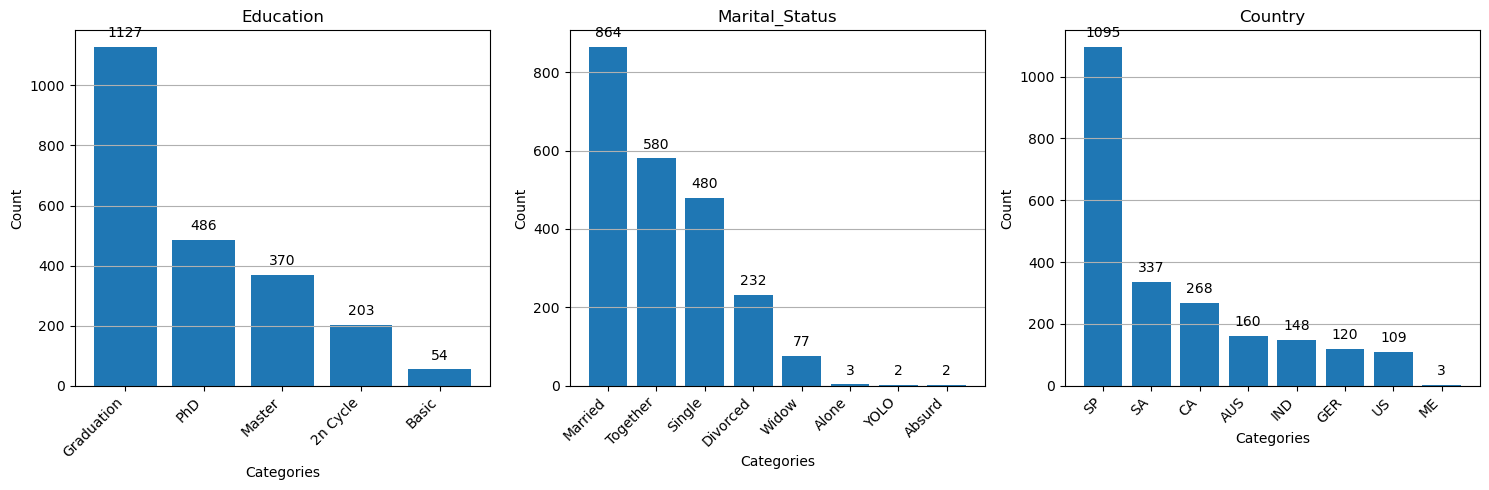

In [30]:
# List of categorical variables
categorical_variables = ['Education', 'Marital_Status', 'Country']  # Example list of categorical variables

# Create subplots for each categorical variable
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_variables), figsize=(15, 5))

for i, var in enumerate(categorical_variables):
    # Count the frequency of unique values
    value_counts = final_df[var].value_counts()
    
    # Plot bar chart
    ax = axes[i]
    ax.bar(value_counts.index, value_counts)
    ax.set_title(var)
    ax.set_xlabel('Categories')
    ax.set_ylabel('Count')
    ax.grid(axis='y')
    
    # Rotate category names
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right')  # Adjust rotation angle as needed
    
    # Add annotations
    for bar in ax.patches:
        ax.annotate(f'{bar.get_height()}', 
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

C:\Users\shikh\AppData\Local\Temp\ipykernel_9844\2547910356.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index, ha='right')  # Adjust rotation angle as needed
C:\Users\shikh\AppData\Local\Temp\ipykernel_9844\2547910356.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index, ha='right')  # Adjust rotation angle as needed


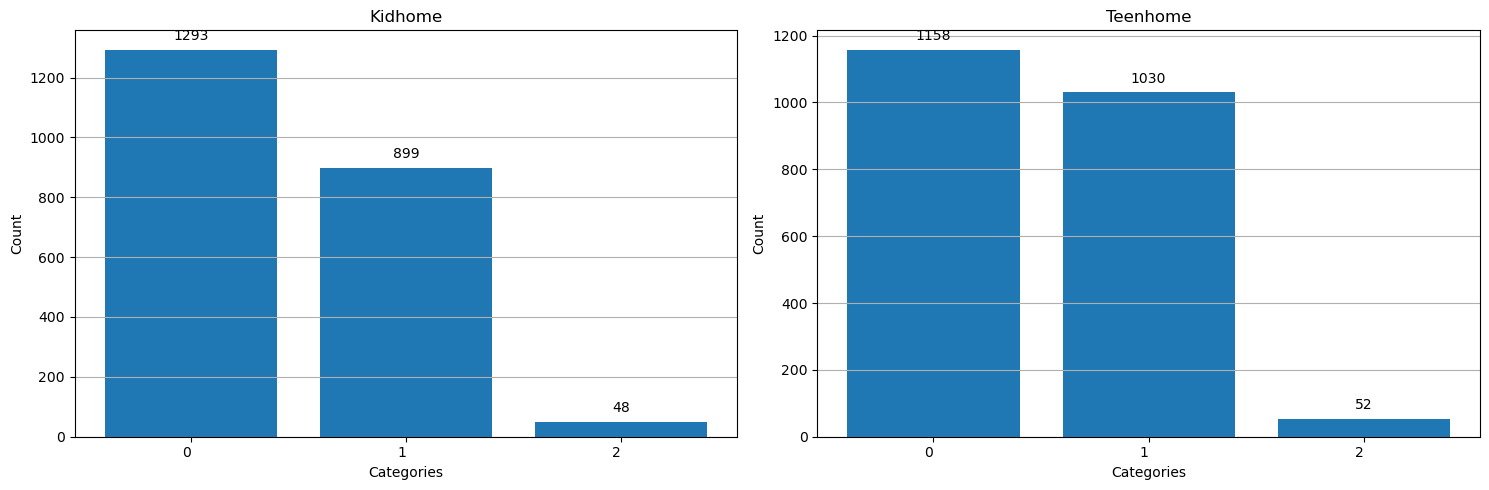

In [31]:
# List of categorical variables
categorical_variables = ['Kidhome', 'Teenhome']  # Example list of categorical variables

# Create subplots for each categorical variable
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_variables), figsize=(15, 5))

for i, var in enumerate(categorical_variables):
    # Count the frequency of unique values
    value_counts = final_df[var].value_counts()
    
    # Plot bar chart
    ax = axes[i]
    ax.bar(value_counts.index, value_counts)
    ax.set_title(var)
    ax.set_xlabel('Categories')
    ax.set_ylabel('Count')
    ax.grid(axis='y')
    
    # Rotate category names
    ax.set_xticklabels(value_counts.index, ha='right')  # Adjust rotation angle as needed
    
    # Add annotations
    for bar in ax.patches:
        ax.annotate(f'{bar.get_height()}', 
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

<div style="background-color: #90EE90; padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
    4. Are there any extreme values of variables representing income, amount of money spent on various categories, recency of purchase?
</div>

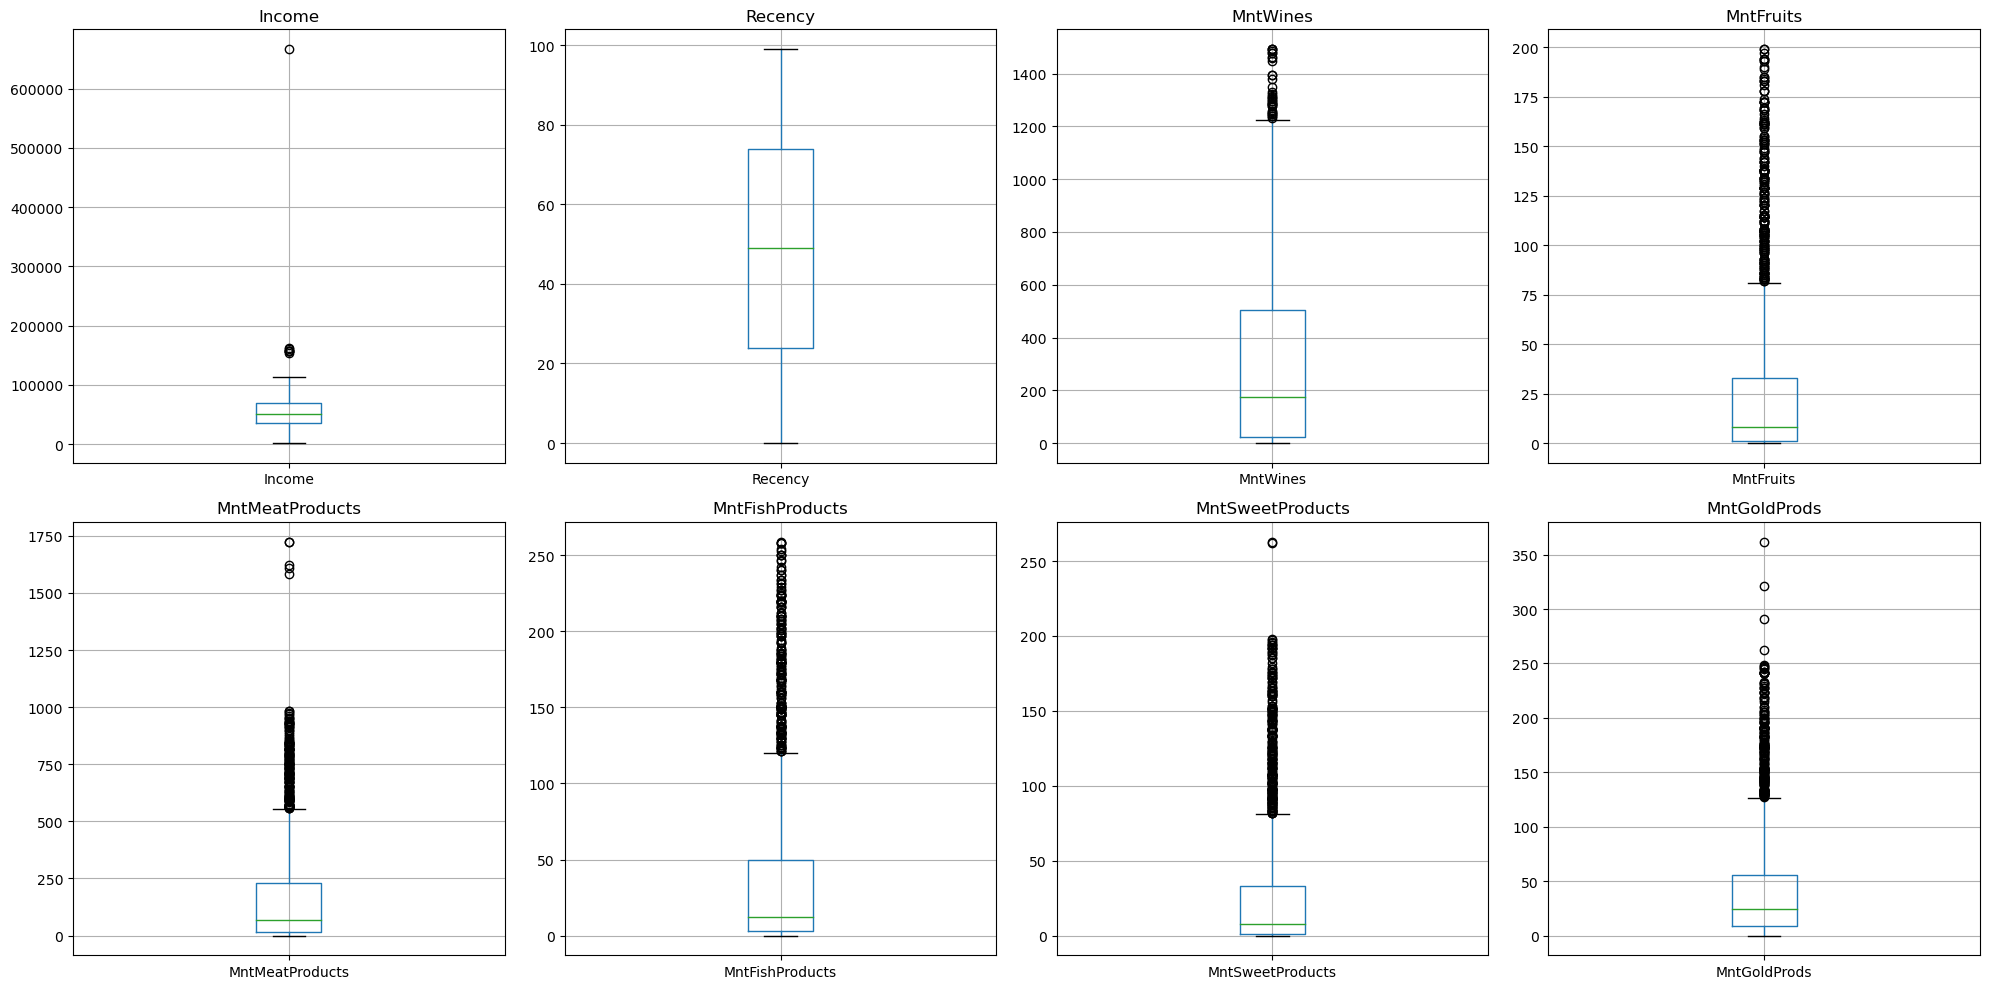

In [32]:
# Select specific columns for box plot
columns_of_interest = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Plotting box plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, col in enumerate(columns_of_interest):
    ax = axes[i // 4, i % 4]
    final_df.boxplot(column=col, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

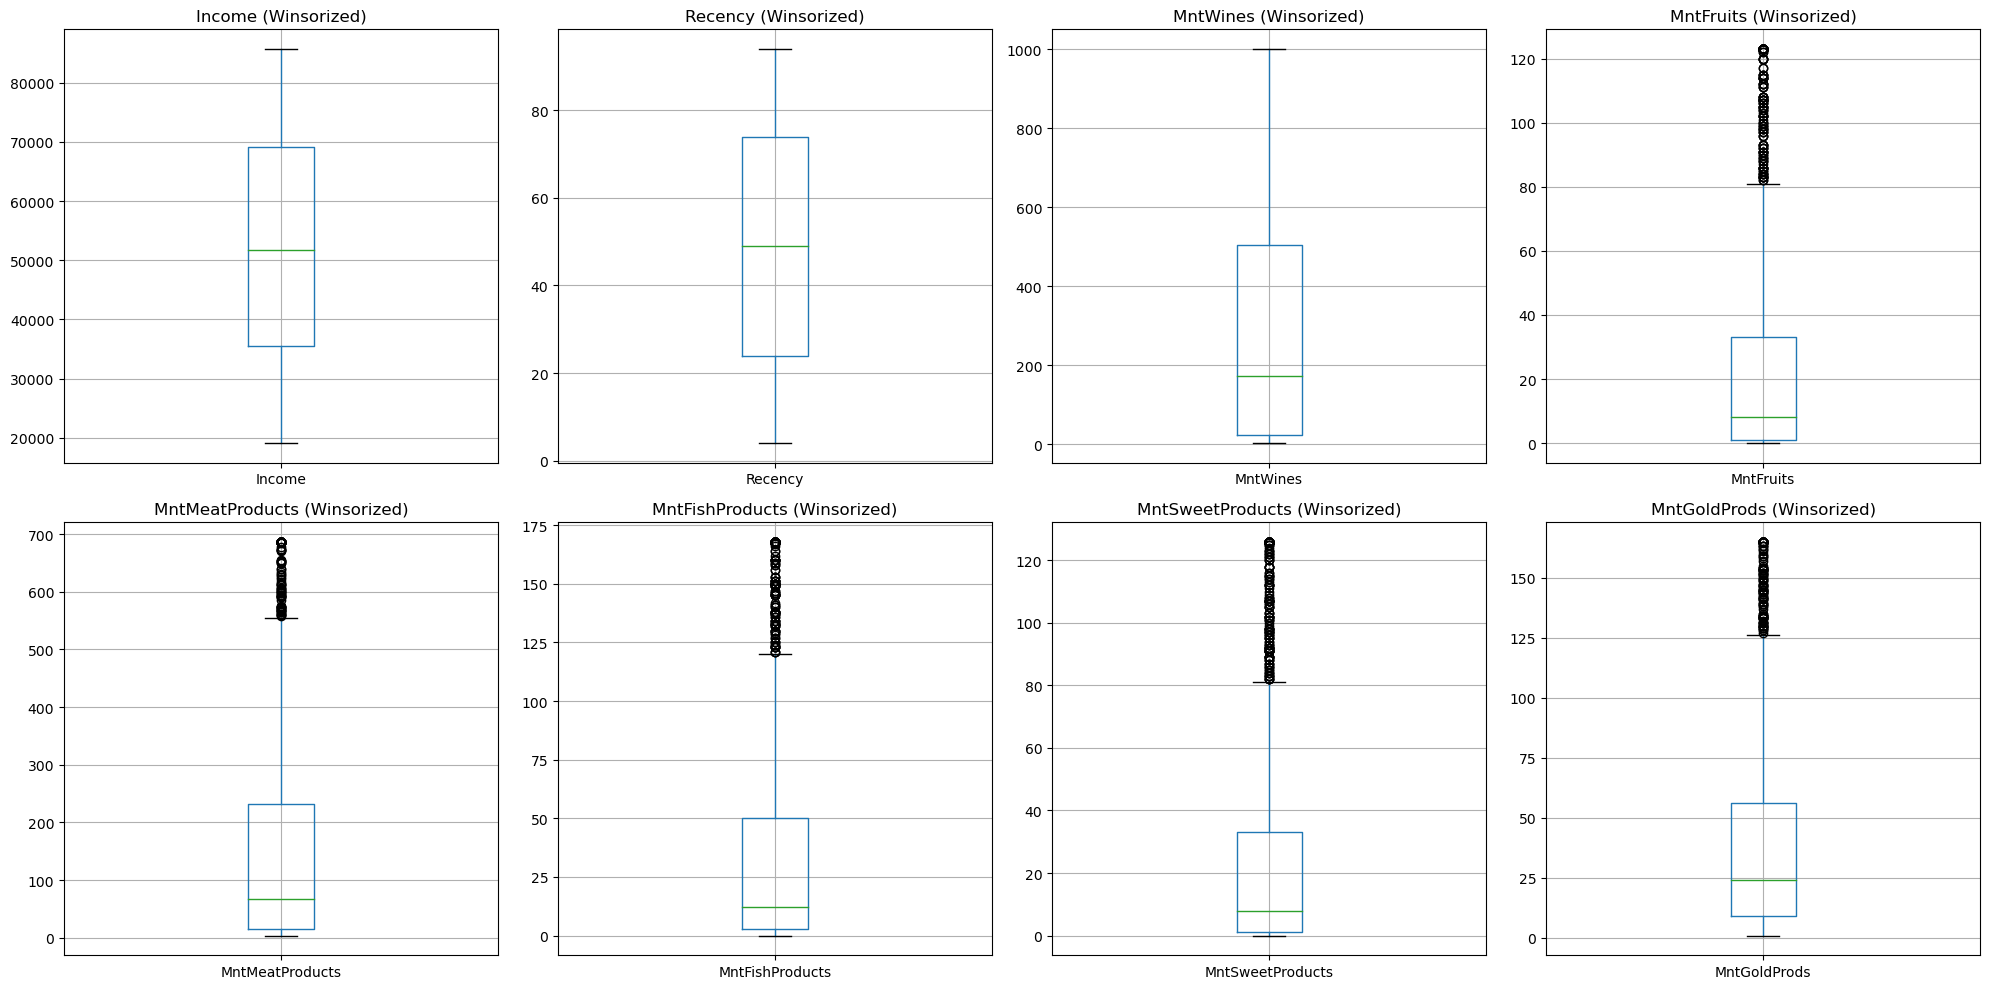

In [33]:
# Winsorize the data for each column
for col in columns_of_interest:
    final_df[col] = winsorize(final_df[col], limits=(0.05, 0.05))  # Winsorize at 5th and 95th percentiles

# Plotting box plots with Winsorized data
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, col in enumerate(columns_of_interest):
    ax = axes[i // 4, i % 4]
    final_df.boxplot(column=col, ax=ax)
    ax.set_title(col + ' (Winsorized)')

plt.tight_layout()
plt.show()

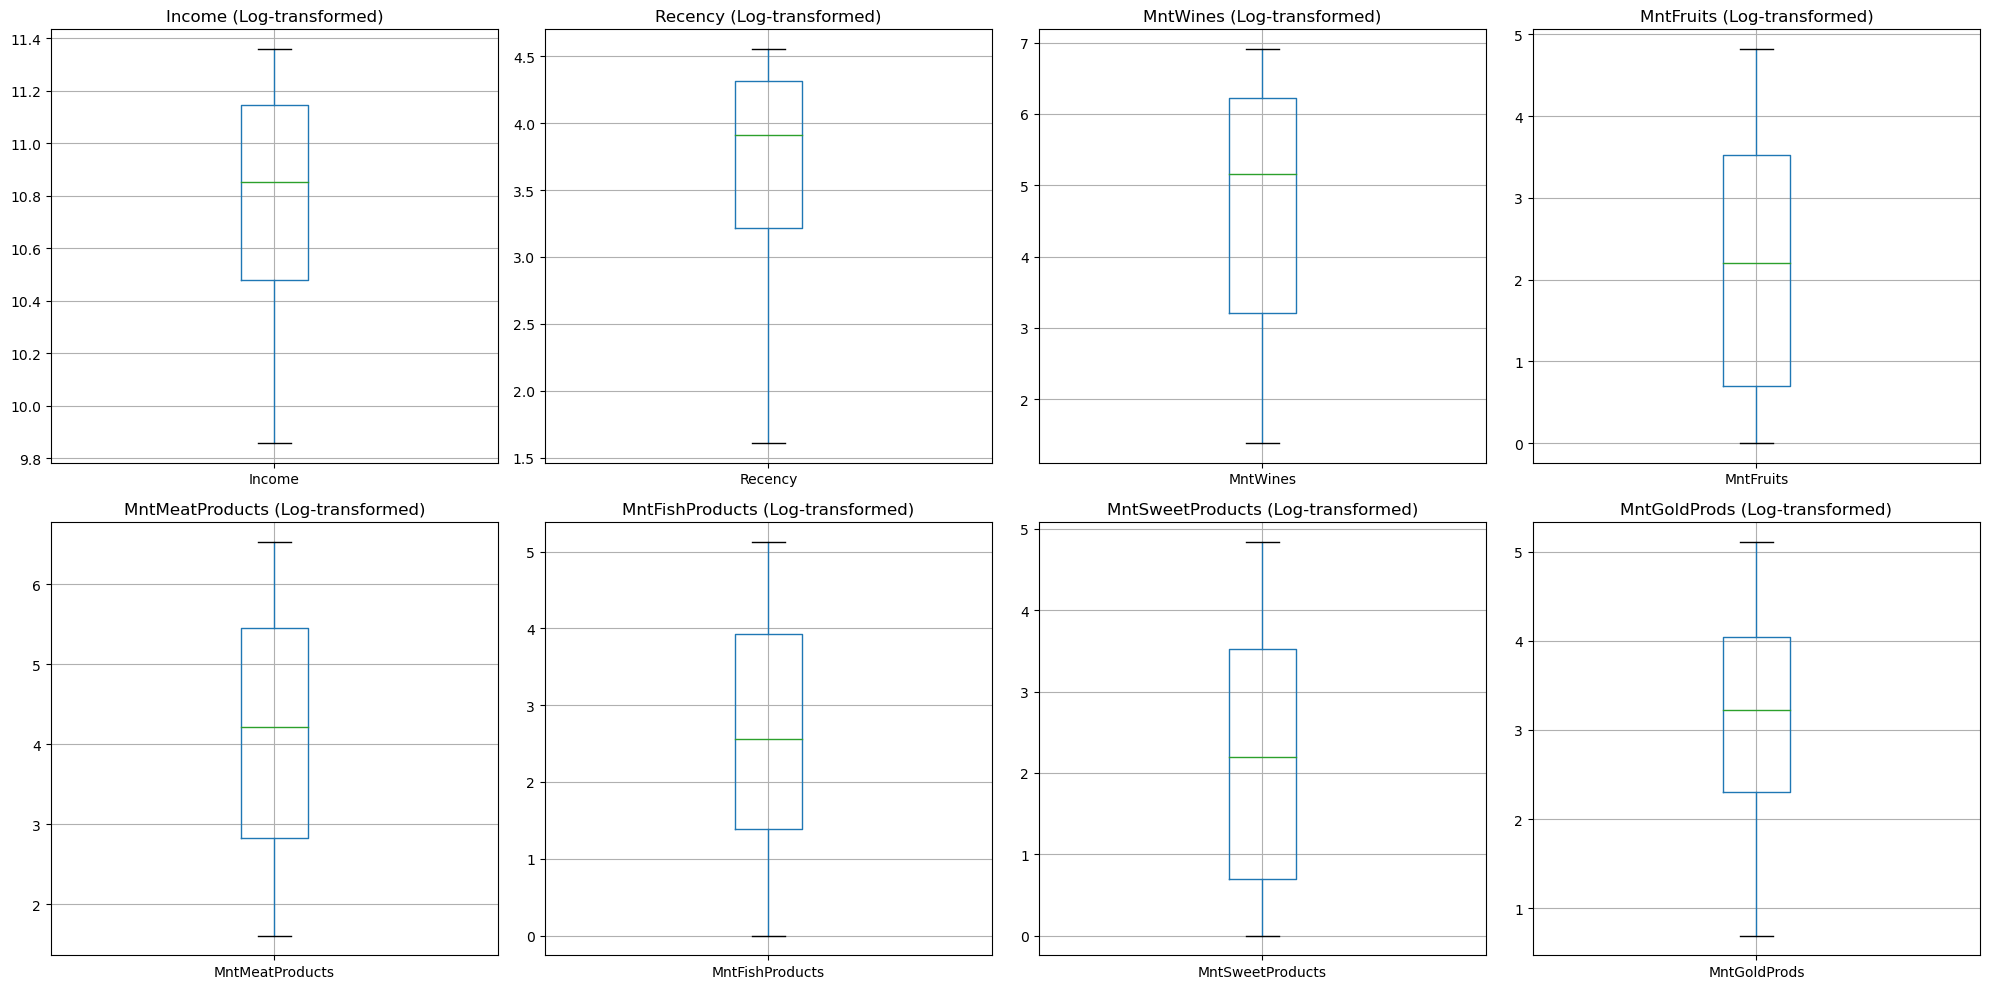

In [34]:
# Apply log transformation to the data for each column
for col in columns_of_interest:
    final_df[col] = np.log(final_df[col] + 1)  # Adding 1 to handle zero values

# Plotting box plots with log-transformed data
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, col in enumerate(columns_of_interest):
    ax = axes[i // 4, i % 4]
    final_df.boxplot(column=col, ax=ax)
    ax.set_title(col + ' (Log-transformed)')

plt.tight_layout()
plt.show()

In [35]:
# Apply log transformation to the data for each column
for col in columns_of_interest:
    final_df[col] = np.log(final_df[col] + 1)  # Adding 1 to handle zero values

# Define Winsorizing limits
winsorize_limits = (0.05, 0.05)  # Example limits

# Winsorize the data for each column
for col in columns_of_interest:
    final_df[col] = winsorize(final_df[col], limits=winsorize_limits)

# Create a boolean mask to identify rows without outliers
outlier_mask = np.logical_and.reduce([
    (final_df[col] >= final_df[col].quantile(0.05)) &
    (final_df[col] <= final_df[col].quantile(0.95))
    for col in columns_of_interest
])

# Replace final_df with the cleaned DataFrame by filtering out rows with outliers
final_df = final_df[outlier_mask]

# Reset index if needed
final_df.reset_index(drop=True, inplace=True)

C:\Users\shikh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\shikh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\shikh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\shikh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\shikh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\shikh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArra

<div style="background-color: #ADD8E6; padding: 5px; border-radius: 5px; font-size: 20px; font-weight: bold">
   STEP - 3 : Business Analysis and Hypothesis (Task 2)
</div> 

<div style="background-color: #90EE90; padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
    5. Generate and check hypothesis around Amount Spent on different categories and response rate in different marketing campaigns.
</div>

In [36]:
# List of spending categories
spending_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Initialize an empty list to store results
results = []

# Iterate through each campaign
for campaign_num in range(1, 6):
    campaign_data = final_df[final_df[f'AcceptedCmp{campaign_num}'] == 1]
    campaign_non_responders = final_df[final_df[f'AcceptedCmp{campaign_num}'] == 0]
    
    # Iterate through each spending category
    for category in spending_categories:
        responders = campaign_data[category]
        non_responders = campaign_non_responders[category]
        
        # Perform independent t-test
        t_stat, p_value = ttest_ind(responders, non_responders)
        
        # Append results to the list
        results.append({
            'Campaign': campaign_num,
            'Spending_Category': category,
            't_statistic': t_stat,
            'p_value': p_value
        })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

In [37]:
results_df.head(30)

,Campaign,Spending_Category,t_statistic,p_value
0,1,MntWines,11.627531,2.189785e-30
1,1,MntFruits,6.784265,1.488525e-11
2,1,MntMeatProducts,12.751749,5.285156e-36
3,1,MntFishProducts,7.100047,1.667923e-12
4,1,MntSweetProducts,8.725283,5.084768e-18
5,1,MntGoldProds,7.376705,2.273728e-13
6,2,MntWines,4.747740,2.187086e-06
7,2,MntFruits,-0.288056,7.733302e-01
8,2,MntMeatProducts,2.965436,3.054507e-03
9,2,MntFishProducts,-1.113022,2.658187e-01


<div style="background-color: rgba(255, 165, 0, 0.5); padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
Interpreting The Results From Above Table
</div>

<div style="background-color: rgba(255, 165, 0, 0.5); padding: 5px; border-radius: 5px; font-size: 12px; font-weight: bold">    
Campaign 1:
    
--> MntWines, MntMeatProducts, MntFishProducts, MntSweetProducts, and MntGoldProds have very low p-values (close to 0),   indicating a statistically significant difference in spending between groups.
    
--> MntFruits has a p-value greater than 0.05, indicating no statistically significant difference in spending between groups.
    
Campaign 2:
    
--> MntWines, MntMeatProducts, and MntGoldProds have low p-values, indicating a statistically significant difference in spending between groups.
    
--> MntFruits, MntFishProducts, and MntSweetProducts have p-values greater than 0.05, indicating no statistically significant 
difference in spending between groups.
    
Campaign 3:
    
--> MntWines, and MntGoldProds have low p-values, indicating a statistically significant difference in spending between groups.
    
--> MntFruits, MntMeatProducts, MntFishProducts, and MntSweetProducts have p-values greater than 0.05, indicating no statistically significant difference in spending between groups.
    
Campaign 4:
    
--> MntWines, MntMeatProducts, MntFishProducts, MntSweetProducts, and MntGoldProds have very low p-values, indicating a statistically significant difference in spending between groups.
    
--> MntFruits has a p-value greater than 0.05, indicating no statistically significant difference in spending between groups.
    
Campaign 5:
    
--> MntWines, MntMeatProducts, MntFishProducts, MntSweetProducts, and MntGoldProds have very low p-values, indicating a statistically significant difference in spending between groups.
    
--> MntFruits has a p-value greater than 0.05, indicating no statistically significant difference in spending between groups.
    
</div>

<div style="background-color: #90EE90; padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
    6. Create a funnel analysis showing what percentage of unique customers accept campaign 1,2, 3,..etc
</div>

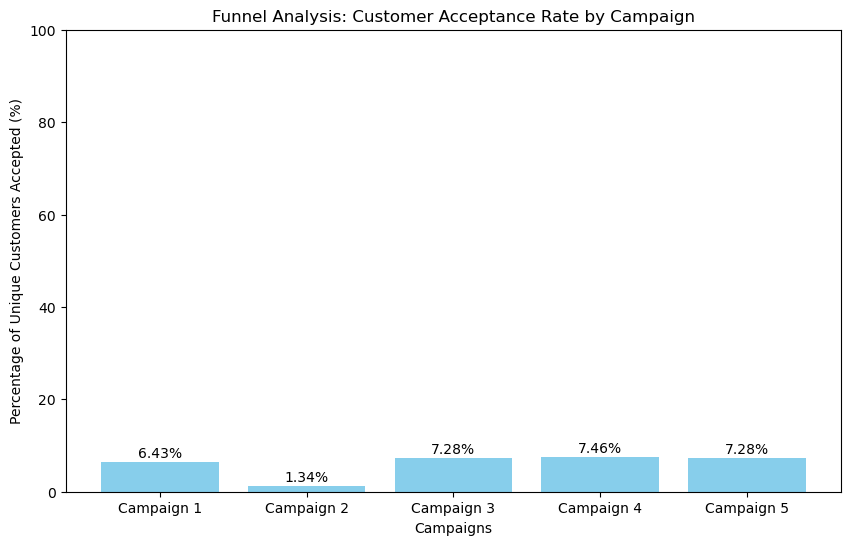

In [38]:
campaign_acceptance_counts = []
total_customers = len(final_df['ID'].unique())

for i in range(1, 6):
    campaign_acceptance_counts.append(len(final_df[final_df[f'AcceptedCmp{i}'] == 1]['ID'].unique()))

# Calculate the percentage of unique customers who accepted each campaign
campaign_acceptance_percentages = [count / total_customers * 100 for count in campaign_acceptance_counts]

# Campaign names
campaigns = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']

# Plot the funnel analysis
plt.figure(figsize=(10, 6))
plt.bar(campaigns, campaign_acceptance_percentages, color='skyblue')
plt.xlabel('Campaigns')
plt.ylabel('Percentage of Unique Customers Accepted (%)')
plt.title('Funnel Analysis: Customer Acceptance Rate by Campaign')
plt.ylim(0, 100)

# Annotate the bars with their values
for i, percentage in enumerate(campaign_acceptance_percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')

plt.show()

In [39]:
binary_columns = final_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']]

In [40]:
# Create an empty DataFrame to store the summary
summary_table = pd.DataFrame()

# Iterate over each column and calculate value counts
for column in binary_columns.columns:
    value_counts = binary_columns[column].value_counts()
    summary_table[column] = value_counts

# Transpose the summary table for better readability
summary_table = summary_table.T

# Rename the index for better clarity
summary_table.index.name = 'Column'

# Rename the columns for better clarity
summary_table.columns = ['0', '1']

# Print the summary table
print(summary_table)

                 0    1
Column                 
AcceptedCmp1  2096  144
AcceptedCmp2  2210   30
AcceptedCmp3  2077  163
AcceptedCmp4  2073  167
AcceptedCmp5  2077  163
Response      1906  334
Complain      2219   21


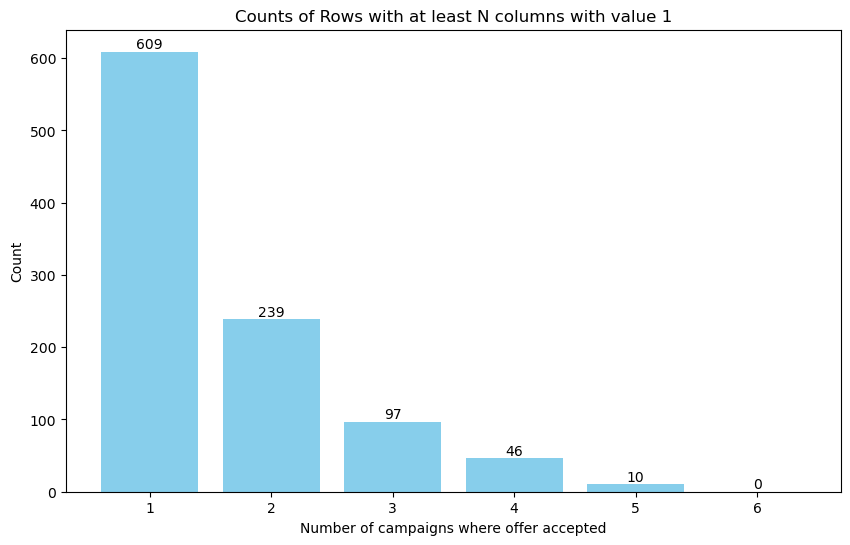

In [41]:
# Select the specified columns
binary_columns = final_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

# Define the thresholds
thresholds = [1, 2, 3, 4, 5, 6]

# Create a dictionary to store the counts for each threshold
counts = {}

# Iterate over each threshold
for threshold in thresholds:
    # Count the number of rows where the sum of values is greater than or equal to the threshold
    count = (binary_columns.sum(axis=1) >= threshold).sum()
    counts[threshold] = count

# Create a DataFrame from the counts dictionary
counts_df = pd.DataFrame.from_dict(counts, orient='index', columns=['Count'])

# Plot the counts as a bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
bars = plt.bar(counts_df.index, counts_df['Count'], color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

# Add title and labels
plt.title('Counts of Rows with at least N columns with value 1')
plt.xlabel('Number of campaigns where offer accepted')
plt.ylabel('Count')

# Show plot
plt.show()

<div style="background-color: #90EE90; padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
    7. Find out how income impacts the amount spent on - Wine - Meat Products - Gold Products - Fish Products
</div>

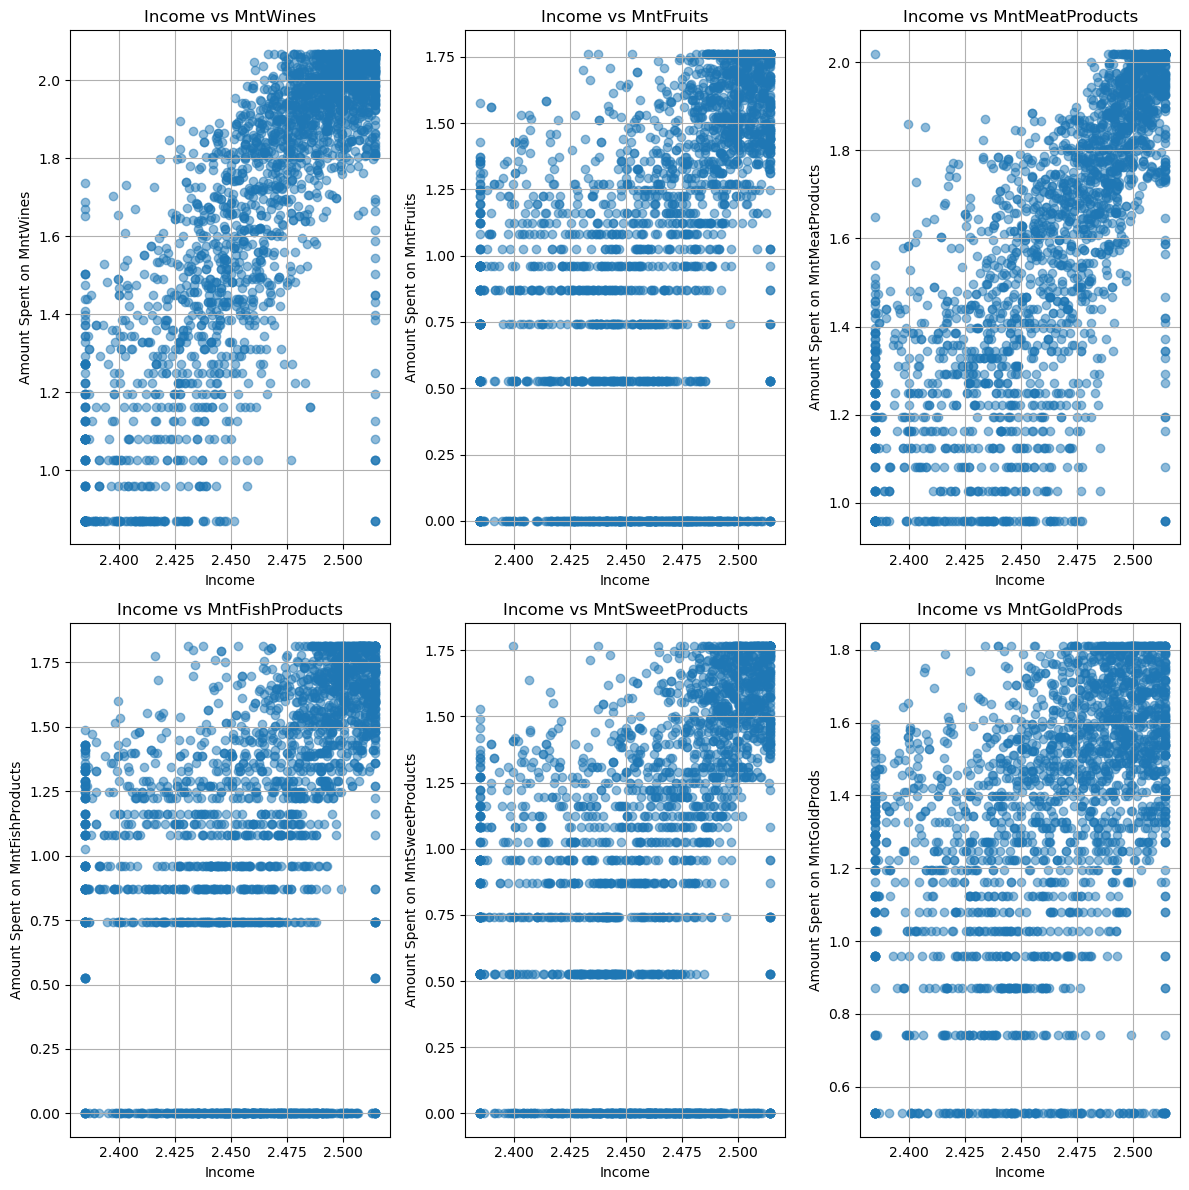

In [42]:
# Define the columns to be analyzed
columns_to_analyze = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create a figure and subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 12))  # 3 rows, 2 columns

# Flatten the axes array for easier iteration
axs = axs.flatten()

# Iterate over each product column (excluding 'Income')
for i, column in enumerate(columns_to_analyze[1:], start=1):
    # Scatter plot
    axs[i-1].scatter(final_df['Income'], final_df[column], alpha=0.5)
    axs[i-1].set_title(f'Income vs {column}')
    axs[i-1].set_xlabel('Income')
    axs[i-1].set_ylabel(f'Amount Spent on {column}')
    axs[i-1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

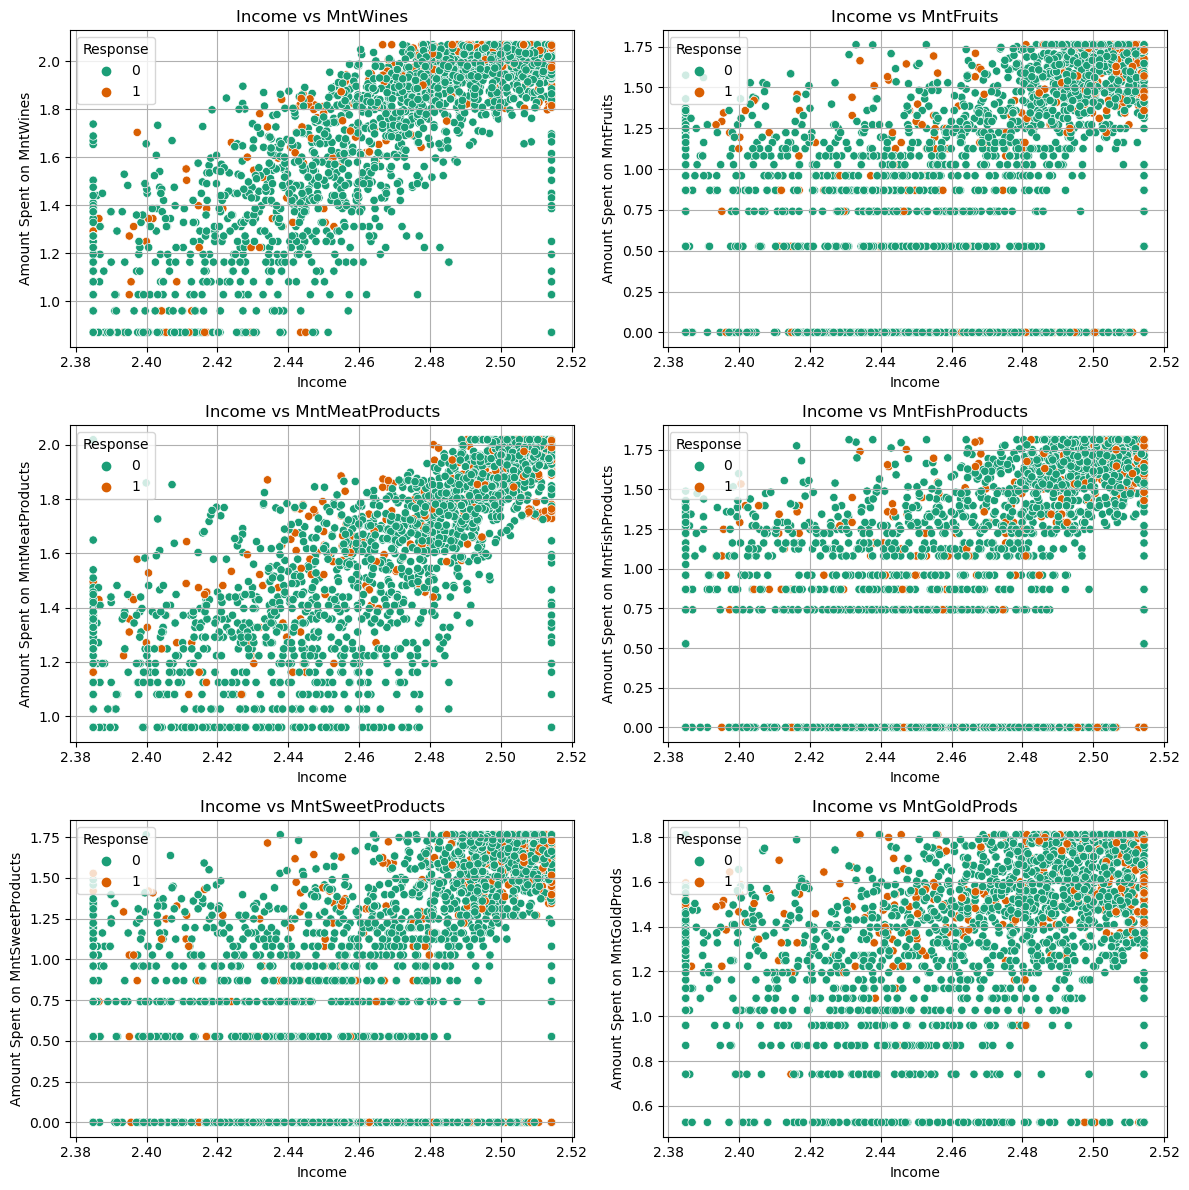

In [50]:
columns_to_analyze = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create a figure and subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))  # 3 rows, 2 columns

# Flatten the axes array for easier iteration
axs = axs.flatten()

# Iterate over each product column (excluding 'Income')
for i, column in enumerate(columns_to_analyze[1:], start=1):
    # Scatter plot with hue
    sns.scatterplot(data=final_df, x='Income', y=column, hue='Response', ax=axs[i-1], palette='Dark2')
    axs[i-1].set_title(f'Income vs {column}')
    axs[i-1].set_xlabel('Income')
    axs[i-1].set_ylabel(f'Amount Spent on {column}')
    axs[i-1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

<div style="background-color: #90EE90; padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
    8. Can you test the hypothesis that recent customers complain less in general compared to older customers?
</div>

In [44]:
# Convert 'Dt_Customer' column to datetime format
final_df['Dt_Customer'] = pd.to_datetime(final_df['Dt_Customer'])

# Find the oldest and most recent dates
oldest_date = final_df['Dt_Customer'].min()
most_recent_date = final_df['Dt_Customer'].max()

print("Oldest Date:", oldest_date)
print("Most Recent Date:", most_recent_date)

C:\Users\shikh\AppData\Local\Temp\ipykernel_9844\328040276.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_df['Dt_Customer'] = pd.to_datetime(final_df['Dt_Customer'])


Oldest Date: 2012-07-30 00:00:00
Most Recent Date: 2014-06-29 00:00:00


In [45]:
# Define recent and older customers based on a threshold (e.g., join date)
threshold_date = pd.to_datetime('2014-01-01')  # Example threshold date
recent_customers = final_df[final_df['Dt_Customer'] >= threshold_date]
older_customers = final_df[final_df['Dt_Customer'] < threshold_date]

# Count complaints for recent and older customers
recent_complaints = recent_customers['Complain'].sum()
older_complaints = older_customers['Complain'].sum()

# Total number of recent and older customers
total_recent_customers = recent_customers.shape[0]
total_older_customers = older_customers.shape[0]

# Create contingency table for chi-square test
contingency_table = [[recent_complaints, total_recent_customers - recent_complaints],
                     [older_complaints, total_older_customers - older_complaints]]

# Perform chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Print results
print("Chi-square test results:")
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)

Chi-square test results:
Chi-square statistic: 0.7628363648756273
p-value: 0.3824423445637971


<div style="background-color: rgba(255, 165, 0, 0.5); padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
Interpreting the Results:
</div>

<div style="background-color: rgba(255, 165, 0, 0.5); padding: 5px; border-radius: 5px; font-size: 12px; font-weight: bold">
--> If the p-value is less than the chosen significance level (e.g., 0.05), reject the null hypothesis and conclude that recent customers complain less in general compared to older customers.
    
    
--> If the p-value is greater than the significance level, fail to reject the null hypothesis, indicating no significant difference in complaint rates between recent and older customers.
</div>

<div style="background-color: #90EE90; padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
    9. Do people who accept the offer in the first campaign also accept in any other campaign?
</div>

In [46]:
# Select relevant columns
campaign_data = final_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]

# Create a contingency table
contingency_table = pd.crosstab(campaign_data['AcceptedCmp1'], 
                                [campaign_data['AcceptedCmp2'], campaign_data['AcceptedCmp3'], 
                                 campaign_data['AcceptedCmp4'], campaign_data['AcceptedCmp5']],
                                rownames=['AcceptedCmp1'], colnames=['AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'])

# Perform chi-square test of independence
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Print results
print("Chi-square test results:")
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)

Chi-square test results:
Chi-square statistic: 463.55584709180073
p-value: 2.6775097340913834e-93


<div style="background-color: rgba(255, 165, 0, 0.5); padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
Interpreting the Results:
</div>

<div style="background-color: rgba(255, 165, 0, 0.5); padding: 5px; border-radius: 5px; font-size: 12px; font-weight: bold">
-->  Since the p-value (2.6775097340913834e-93) is significantly less than the chosen significance level (e.g., 0.05), we reject the null hypothesis.
    
-->  Therefore, we conclude that there is a significant association between accepting offers in the first campaign and accepting offers in other campaigns.
</div>

<div style="background-color: #90EE90; padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
    10. Profile of people who respond vs. who don’t.
</div>